In [0]:
from scipy import stats
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

### Problem
A survey of CPAs across the United States found that the average net income for sole proprietor CPAs is 74,914 dollar.Because this survey is now more than ten years old, an
accounting researcher wants to test this figure by taking a random sample of 112 sole pro-
prietor accountants in the United States to determine whether the net income figure
changed.Suppose the 112 CPAs who respond produce a sample
mean of 78,695 dollar.
Assume the
population standard deviation of net incomes for sole proprietor CPAs is $14,530.

### Solution
Estimate : Mean
</br>Sample Size >= 30
</br>Population Standard Deviation is known
</br>Z-Distribution will be used for Hypothesis Testing

#### Hypothesis Formulation
H0 : Mean is equal to 74914
</br>Ha : Mean not equal to 74914

In [0]:
alpha = 0.05
sample_size =112
sample_mean = 78695
population_mean = 74914
population_std = 14530

In [0]:
# Scipy Stas does not have method for Z test. Hence these Steps


# Sampling Distribution will centeres at Population mean
sample_dist_mean = population_mean

# Sampling Distribution Standard Deviation 
sample_dist_std = population_std/sqrt(sample_size)


sample_dist = stats.norm(loc=sample_dist_mean,scale=sample_dist_std)

In [0]:
# Assumping Null Hyopthesis is True, Probability of observing the sampling mean equal to or greater than 78695
upper_tail_prob = sample_dist.sf(sample_mean)
upper_tail_prob = round(upper_tail_prob,4)
upper_tail_prob

0.0029

In [0]:
if upper_tail_prob <= alpha/2:
  print('Reject Null Hypothesis')
else:
  print('Fail to Reject Null Hypothesis ')

Reject Null Hypothesis


### Conclusion
The
researcher has enough evidence to reject the figure of $74,914 as the true national average
net income for sole proprietor CPAs.

### Problem

Figures released by the U.S. Department of Agriculture show that the average size
of farms has increased since 1940. In 1940, the mean size of a farm was 174 acres;
by 1997, the average size was 471 acres. Between those years, the number of farms
decreased but the amount of tillable land remained relatively constant, so now
farms are bigger. This trend might be explained, in part, by the inability of small
farms to compete with the prices and costs of large-scale operations and to produce
a level of income necessary to support the farmers’ desired standard of living.
Suppose an agribusiness researcher believes the average size of farms has now
increased from the 1997 mean figure of 471 acres. To test this notion, she randomly
sampled 23 farms across the United States and ascertained the size of each farm
from county records. The data she gathered follow. Use a 5% level of significance to
test her hypothesis. Assume that number of acres per farm is normally distributed
in the population.

445 489 474 505 553 477 454 463 466
557 502 449 438 500 466 477 557 433
545 511 590 561 560

### Solution
Mean Estimation
</br>Population is Normally Distributed
</br>Population std is not known
</br>t-test will be used for Hypothesis Testing

#### Hypothesis Formulation
Null: Mean is 471
</br>Alternate: Mean is greater than 471

In [0]:
sample = [445,489,474,505,553,477,454,463,466,557,502,449,438,500,466,477,557,433,545,511,590,561,560]
confidence = 0.05
sample_size = len(sample)
df = sample_size - 1
population_mean = 471

In [0]:
sample_mean = np.mean(sample)
sample_mean

498.7826086956522

In [0]:
# stats ttest always return p value for two tail test
t_stats, two_tail_p = stats.ttest_1samp(sample,population_mean)

# as t distribution is symmetric, one tail p is half of two tail p
one_tail_p = two_tail_p/2
one_tail_p

0.004781637924933889

In [0]:
if one_tail_p < confidence :
  print('Reject Null Hypothesis')
else:
  print('Fail to Reject Null Hypothesis ')

Reject Null Hypothesis


### Conclusion
accepts the alternative
hypothesis and concludes that the average size of a U.S. farm is now more than
471 acres.

### Problem
A manufacturer believes exactly 8% of its products contain at least one minor flaw.
Suppose a company researcher wants to test this belief.
The business researcher randomly selects a sample
of 200 products, inspects each item for flaws, and determines that 33 items have at least
one minor flaw.

### Solution
Estimate : Proportion
Z-test for testing the hypothesis


#### Hyopthesis Formulation
Null : sample proportion = 0.08
</br>Alternate : sample proportion is not 0.08

In [0]:
n = 200
confidence = 0.05
sample_flaw = 33
sample_p = 33/200
population_p = 8/100
population_q = 1- population_p

In [0]:
# Mean & Standard deviation for sample proportion distribution
sample_dist_std = sqrt((population_p * population_q)/n )
sample_dist_mean = population_p
# sample proportion distribution follows normal distribution 
sample_dist = stats.norm(loc= sample_dist_mean,scale=sample_dist_std)

In [0]:
sample_p

0.165

In [0]:
pval = sample_dist.sf(sample_p)
pval

4.691349058582895e-06

In [0]:
critical_p = confidence/2
if pval < critical_p :
  print('Reject Null Hypothesis')
else:
  print('Fail to Reject Null Hypothesis ')

Reject Null Hypothesis


### Problem
A small business has 37 employees. Because of the uncertain demand for its product,
the company usually pays overtime on any given week. The company assumed
that about 50 total hours of overtime per week is required and that the variance on
this figure is about 25. Company officials want to know whether the variance of overtime
hours has changed. Given here is a sample of 16 weeks of overtime data (in
hours per week). Assume hours of overtime are normally distributed. Use these data
to test the null hypothesis that the variance of overtime data is 25. Let alpha be 0.10


57 56 52 44
46 53 44 44
48 51 55 48
63 53 51 50

### Solution
Estimate : variance
</br>Population is normally distributed
</br>Chi-Square distribution will be used to test the hypothesis

#### Hypothesis Formulation
Null : Population variance is 25
</br>Alternate: Population variance is not 25

In [0]:
sample = [57,56,52,44,46,53,44,44,48,51,55,48,63,53,51,50]
population_var = 25
alpha = 0.10
sample_size = len(sample)
sample_var = np.var(sample,ddof=1)
df =sample_size-1

In [0]:
critical = alpha/2
chi_critical_ub = stats.chi2.ppf(1-critical,df=df)
chi_critical_lb = stats.chi2.ppf(critical,df=df)
print(f"Reject the null hypothesis if observed chi2 is less than {chi_critical_lb} or greater than {chi_critical_ub}")

Reject the null hypothesis if observed chi2 is less than 7.2609439276700325 or greater than 24.995790139728616


In [0]:
sample_chi2 = (df *sample_var)/population_var
sample_chi2

16.8375

In [0]:
if sample_chi2 < chi_critical_lb or sample_chi2 > chi_critical_lb :
  print('Reject Null Hypothesis')
else:
  print('Fail to Reject Null Hypothesis ')

Reject Null Hypothesis


## Computing Type 2 Error & Power Analysis
For example,
suppose a researcher is conducting a statistical test on the following hypotheses.
</br>Null : Mean Can weight is greater than or equal to 12 ounces 
</br> Alternate: Mean Can weight is less than 12 ounces
</br>Suppose that, in testing the preceding hypotheses, a sample of 60 cans of beverage.
yields a sample mean of 11.985 ounces. Assume that the population standard deviation is
0.10 ounces.

#### Solution
sample size >= 30
</br>population std is known
</br>z distribution will used for computing Type 2 error


In [0]:
sample_size = 60
sample_std = 0.10
alpha = 0.05
null_population_mean = 12

##### Assuming Null Hypothesis is True i.e. Population Mean is 12, we will now compute the probability of we have mean value less than 12 at alhpa = 0.05.
we will compute lower tail critical point (reject region) below which we can say that population mean is less than 12. Above critical point (non-rejection region) we can say that mean value is greater than or equal 12


In [0]:
# Assuming null is True i.e. Population mean is 12 .
sample_mean_std = sample_std/sqrt(sample_size)
null_dist = stats.norm(loc=null_population_mean,scale=sample_mean_std)
lower_critical = null_dist.ppf(0.05)
lower_critical = round(lower_critical,3)
print(f"If Null Hypothesis is True, i.e. Population Mean is >= 12 then Null Hypothesis will not be rejected if sample mean is above {lower_critical}")


If Null Hypothesis is True, i.e. Population Mean is >= 12 then Null Hypothesis will not be rejected if sample mean is above 11.979


##### Our sample mean of 60 Can is 11.985 which is greater than 11.979 Hence either we have made correct decion of Failing to Reject Null or we have made Type-2 error. <br>Suppose Ground Truth was That Alternate Hypotehsis was True, Population Mean was 11.99. In this case we have made Type-2 error.<br>Probability of Type-2 error when population Mean was 11.99 is equal to probbaility of getting sample mean value greater 11.979

In [0]:
# Assuming Alternate is True i.e. Population mean is < 12 i.e. 11.99,probbaility of getting sample mean value greater 11.979
alternate_population_mean = 11.99
alternate_dist = stats.norm(loc=alternate_population_mean,scale=sample_mean_std)
beta = alternate_dist.sf(lower_critical) * 100
beta = round(beta,2) 
print(f"there is an {beta}% chance of committing a Type II error if the alternative mean is 11.99 ounces")

there is an 80.29% chance of committing a Type II error if the alternative mean is 11.99 ounces


##### Operation Characteric Plot for various values of Alternate Mean < 12

In [0]:
alt_mean = [11.999,11.995,11.99,11.98,11.97,11.96,11.95]
beta_list = []
for mean in alt_mean:
  alternate_dist = stats.norm(loc=mean,scale=sample_mean_std)
  beta = alternate_dist.sf(lower_critical) 
  beta = round(beta,2)
  beta_list.append(beta)

(array([11.94, 11.95, 11.96, 11.97, 11.98, 11.99, 12.  , 12.01]),
 <a list of 8 Text xticklabel objects>)

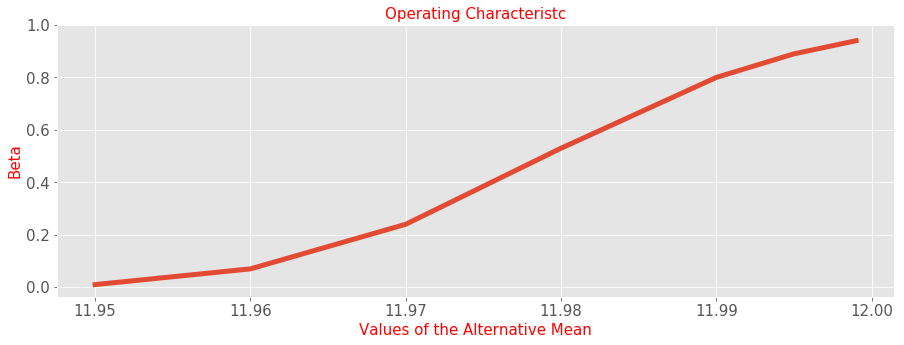

In [0]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.plot(alt_mean, beta_list,linewidth=5,)
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=15)
plt.title('Operating Characteristc',fontsize=15,color='red')
plt.xlabel('Values of the Alternative Mean',fontsize=15,color='red')
plt.ylabel('Beta',fontsize=15,color='red')
plt.xticks(fontsize=15)

(array([11.94, 11.95, 11.96, 11.97, 11.98, 11.99, 12.  , 12.01]),
 <a list of 8 Text xticklabel objects>)

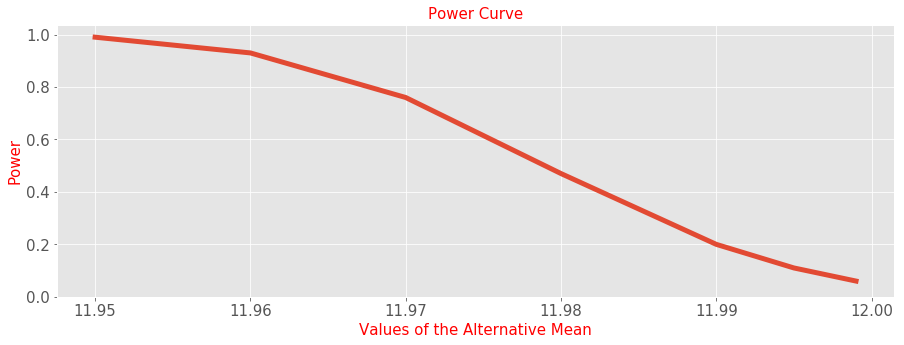

In [0]:
power = [round(1-beta,2) for beta in beta_list]
plt.figure(figsize=(15,5))
plt.plot(alt_mean, power,linewidth=5,)
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0,],fontsize=15)
plt.title('Power Curve',fontsize=15,color='red')
plt.xlabel('Values of the Alternative Mean',fontsize=15,color='red')
plt.ylabel('Power',fontsize=15,color='red')
plt.xticks(fontsize=15)